<a href="https://colab.research.google.com/github/koitran14/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)** (DANG KHOI - ITCSIU21197)


## **Library & data import**

In [2]:
!pip install optuna

In [193]:
# To handle the data
import pandas as pd
import numpy as np

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess the data
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**About the data (Description of attributes)**

* age: Age of the patient

* anaemia: Decrease of red blood cells or hemoglobin (Boolean)

* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

* diabetes: If the patient has diabetes (Boolean)

* ejection_fraction: Percentage of blood leaving the heart at each contraction

* high_blood_pressure: If the patient has hypertension (Boolean)

* platelets: Platelets in the blood (kiloplatelets/mL)

* serum_creatinine: Level of serum creatinine in the blood (mg/dL)

* serum_sodium: Level of serum sodium in the blood (mEq/L)

* sex: Woman = 0, Man = 1

* smoking: If the patient smokes or not (Boolean)

* time: Follow-up period (days)

* DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)





*Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)*

## **Explore the Dataset**

### **Overview:**

In [5]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 299 rows and 13 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


* **Note:** There's no duplicated rows in this dataset.

### **Check outliers**

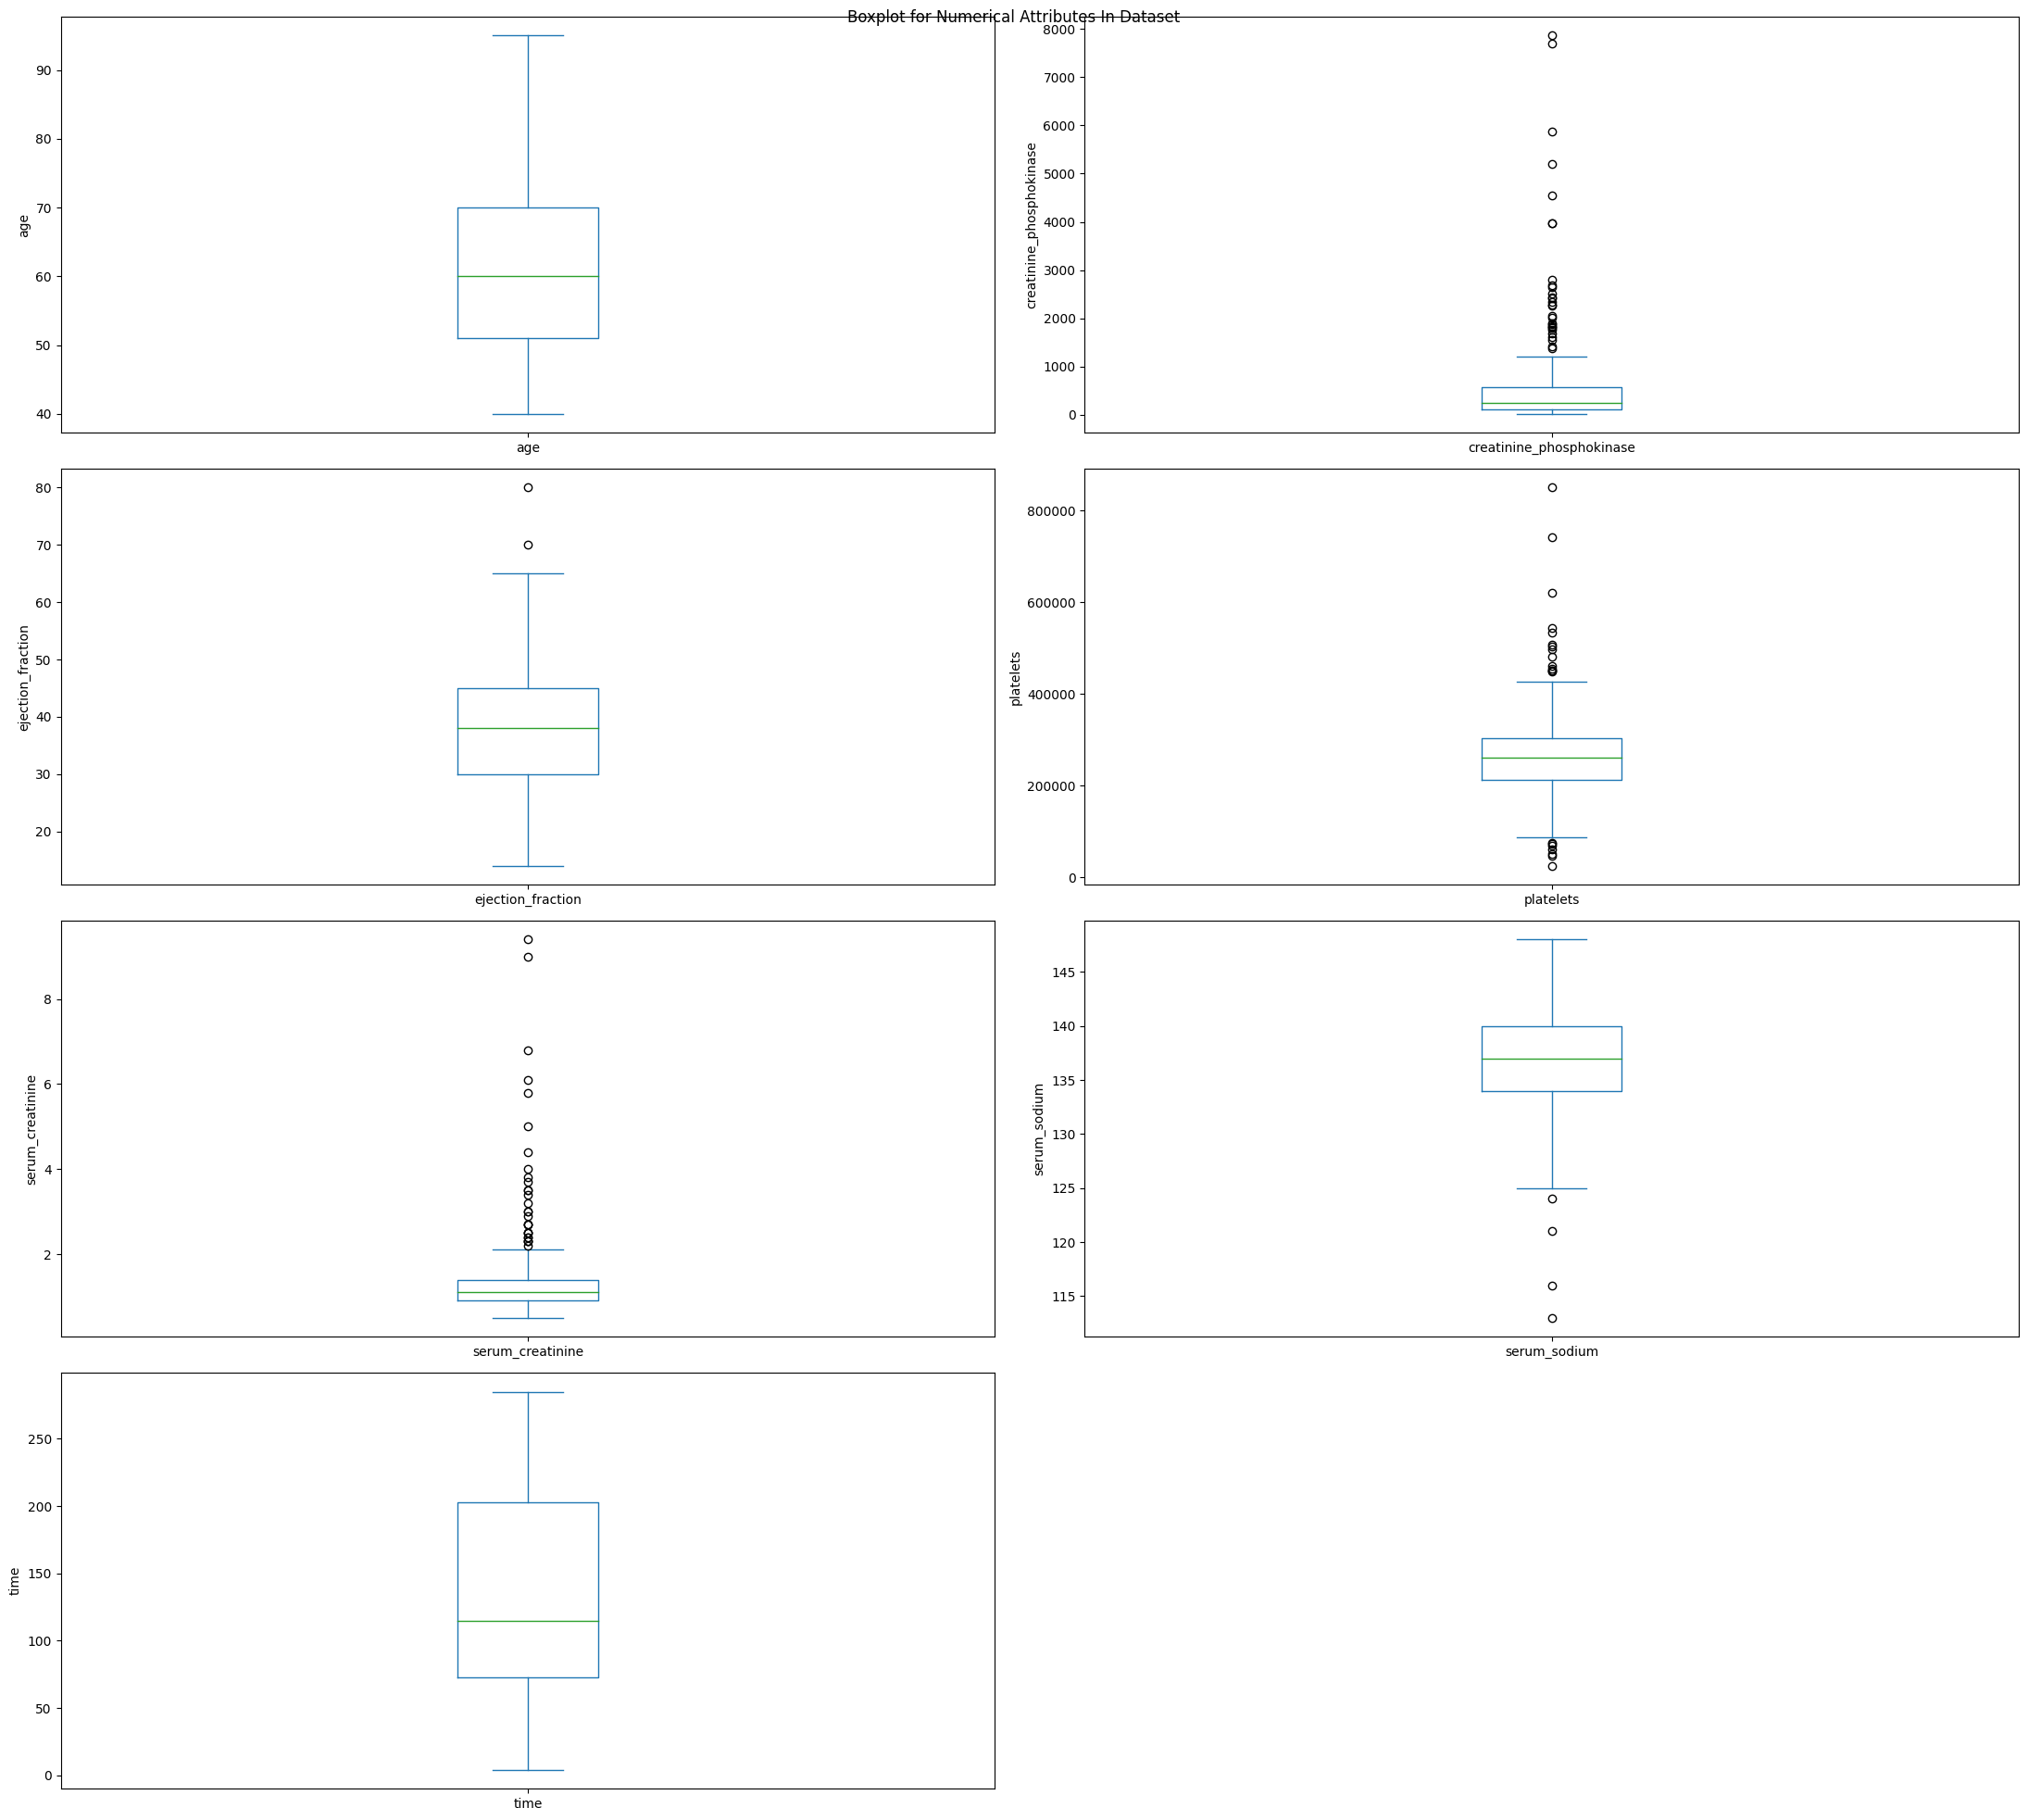

In [9]:
# Specify the column names of the attributes you want to include
specific_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create subplots for specific columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(specific_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x')

# Hide empty subplots
for j in range(len(specific_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplot for Numerical Attributes In Dataset')
plt.tight_layout()
plt.show()


* **Notation:** There're outliers existing in dataset.

### **Check imbalance in dataset**

* **Check the balance of key attribute's distribution**

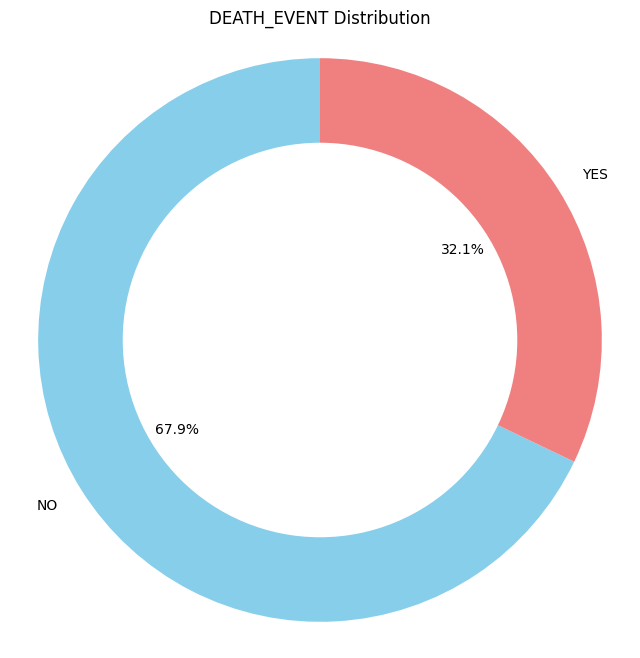

In [10]:
# Mapping labels to custom values
label_map = {1: 'YES', 0: 'NO'}

# Map the 'DEATH_EVENT' column using the label_map dictionary
df_graph = df.copy()
df_graph['DEATH_EVENT_label'] = df_graph['DEATH_EVENT'].map(label_map)

# Count the occurrences of each DEATH_EVENT value
death_event_counts = df_graph['DEATH_EVENT_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=death_event_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('DEATH_EVENT Distribution')

# Draw a white circle at the center to create the donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

* **Check the balance density between target with other categorical variables:**

In [11]:
# Analyzing the distribution of categorical variables
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
categorical_distributions = df[categorical_columns].apply(lambda x: x.value_counts(normalize=True))

categorical_distributions

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0.568562,0.58194,0.648829,0.351171,0.67893
1,0.431438,0.41806,0.351171,0.648829,0.32107


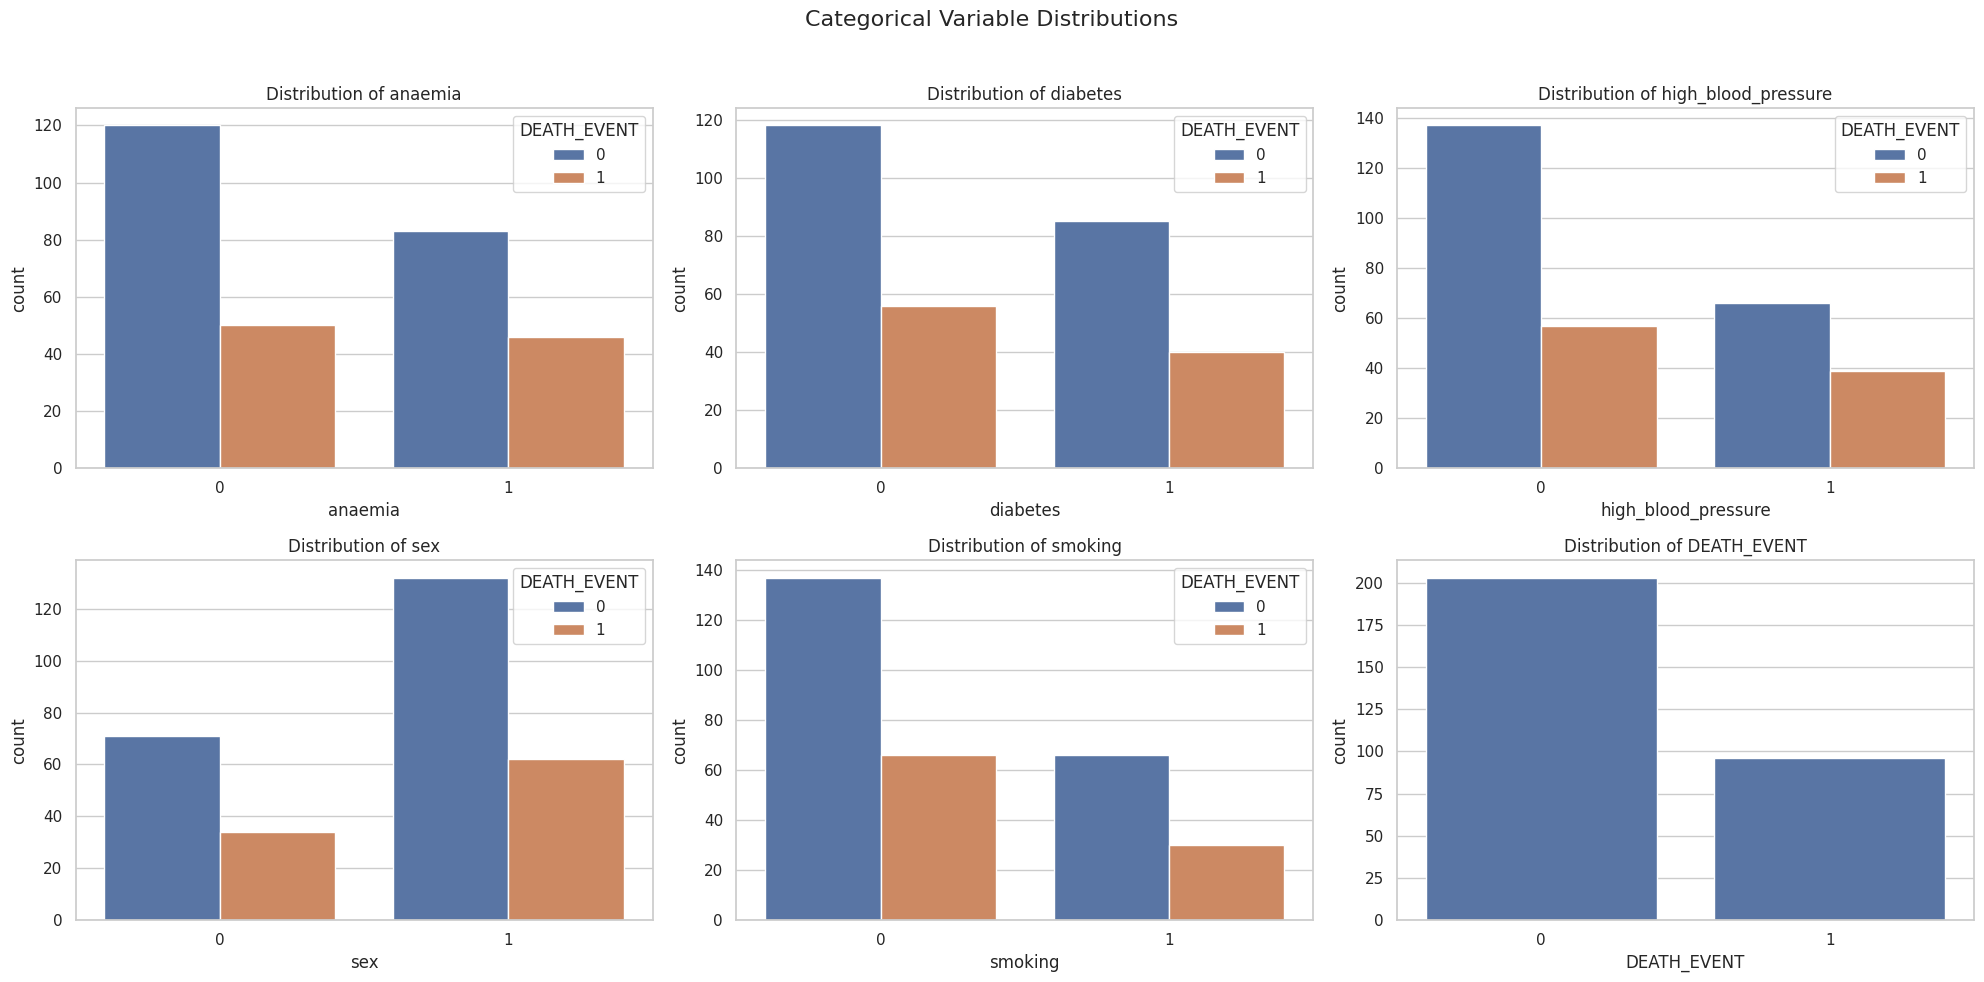

In [12]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Function to plot bar plots for categorical variables
def plot_categorical_distributions(data, columns, target):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.countplot(data=data, x=col, hue=target)
        plt.title(f'Distribution of {col}')
    plt.subplot(2, 3, len(columns)+1)
    sns.countplot(data=data, x=target)
    plt.title(f'Distribution of {target}')
    plt.suptitle('Categorical Variable Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plot_categorical_distributions(df, categorical_columns, 'DEATH_EVENT')

* **Check the balance of target with continuous variables:**

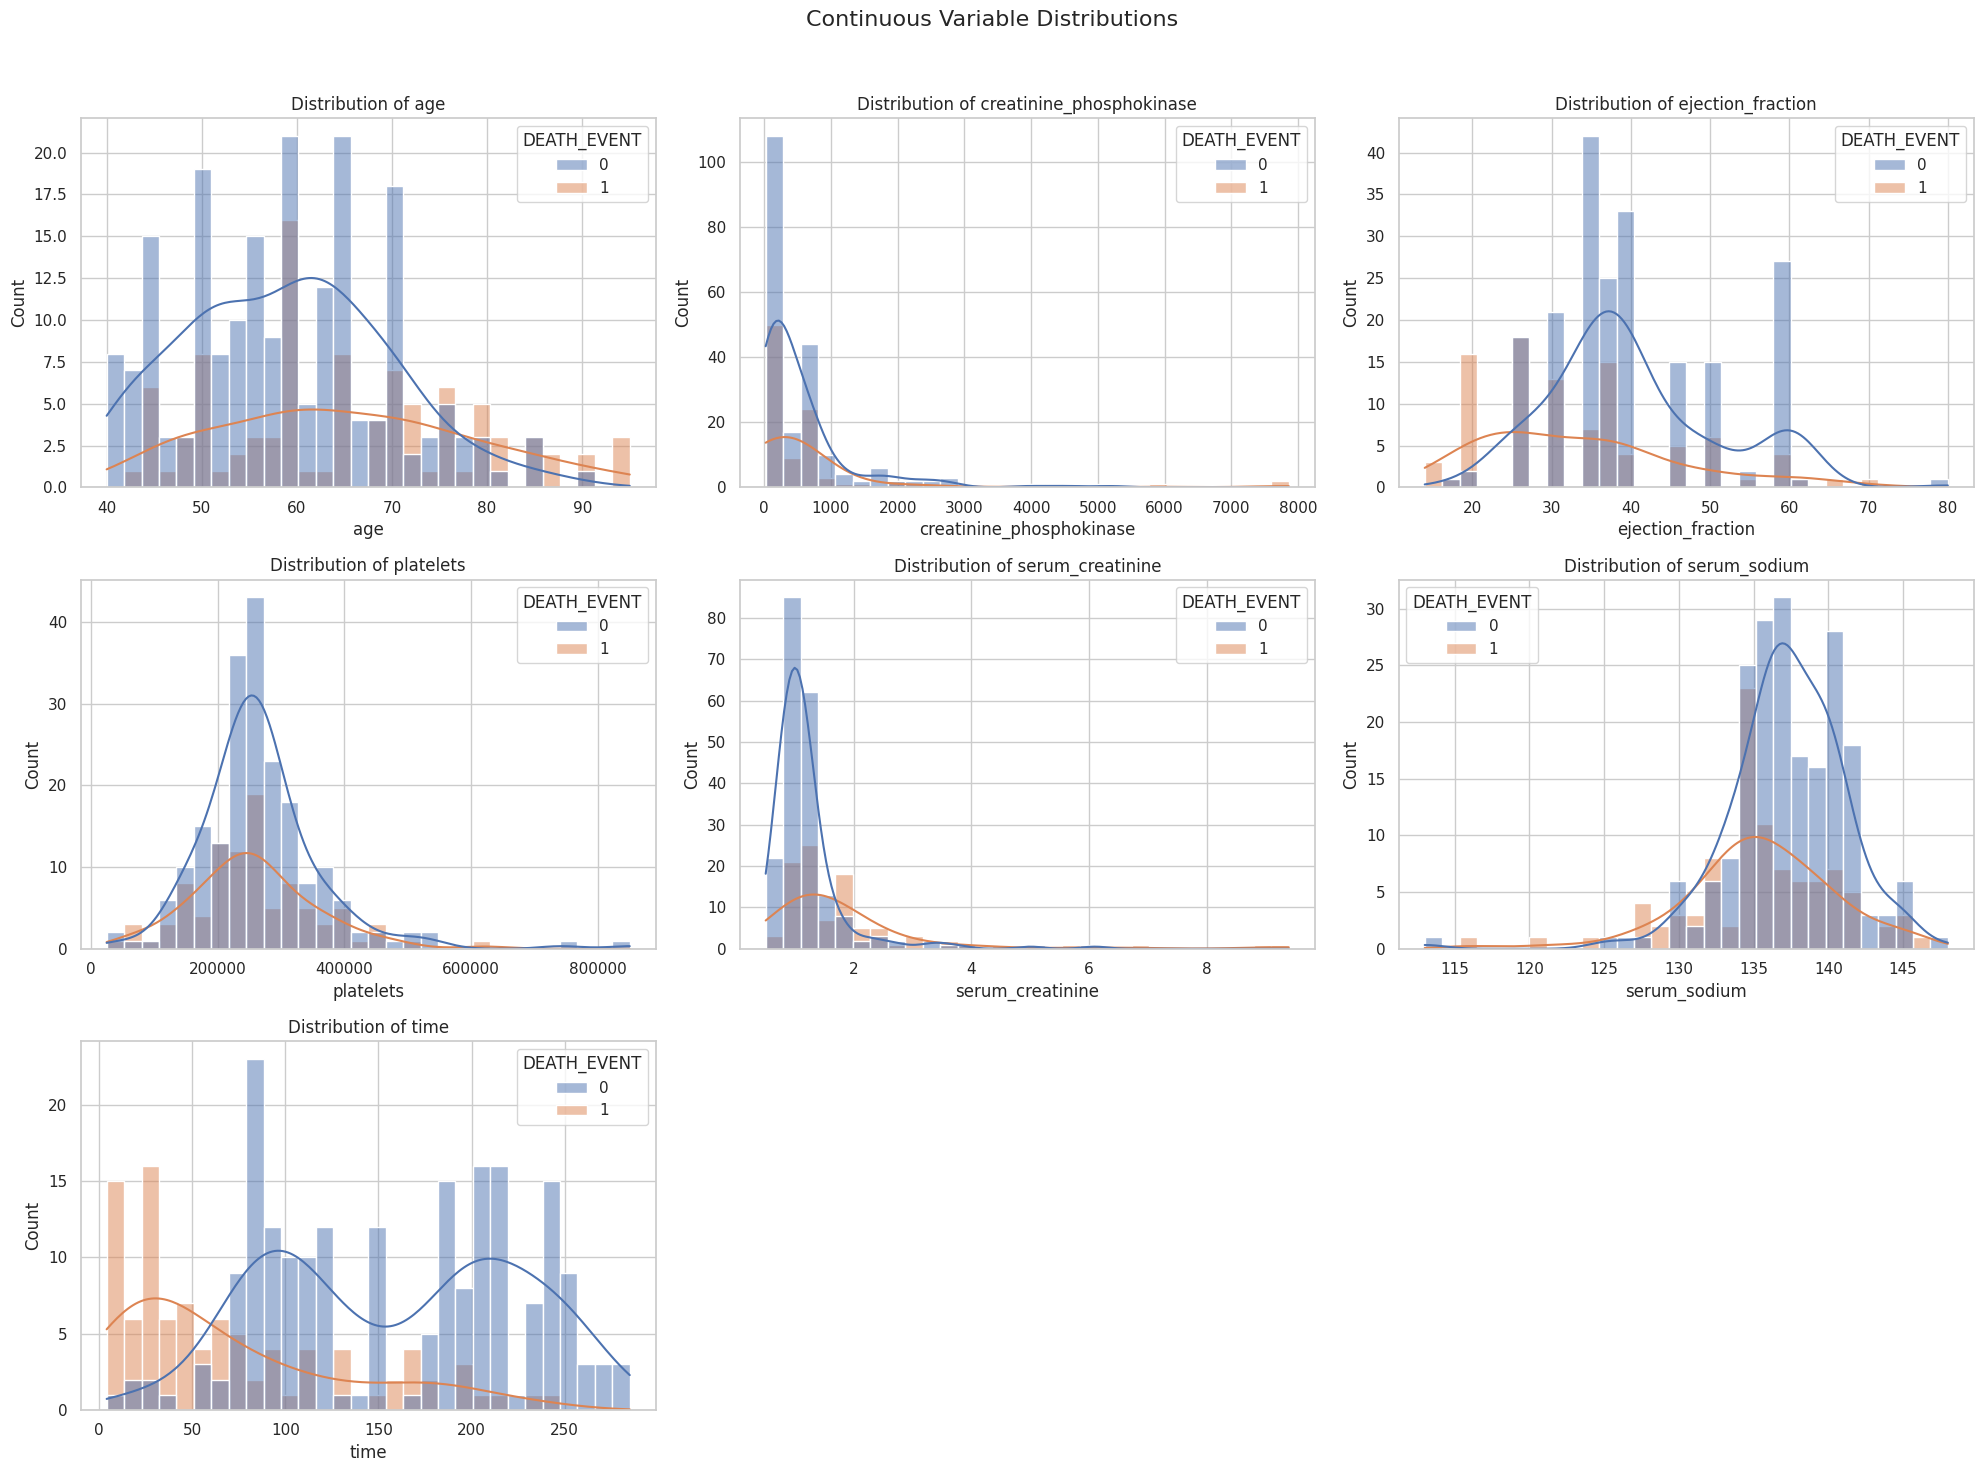

In [13]:
# Function to plot histograms for continuous variables
def plot_continuous_distributions(data, columns, target):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data, x=col, hue=target, kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.suptitle('Continuous Variable Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Plot continuous distributions
continuous_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plot_continuous_distributions(df, continuous_columns, 'DEATH_EVENT')

**Notation:** The dataset has some imbalance, particularly in the target variable and a few categorical variables like `high_blood_pressure` and `sex`. Continuous variables exhibit a wide range, which is typical for medical data.

### **Check correlations & trends in dataset**

Text(0.5, 1.0, 'Correlation Heatmap')

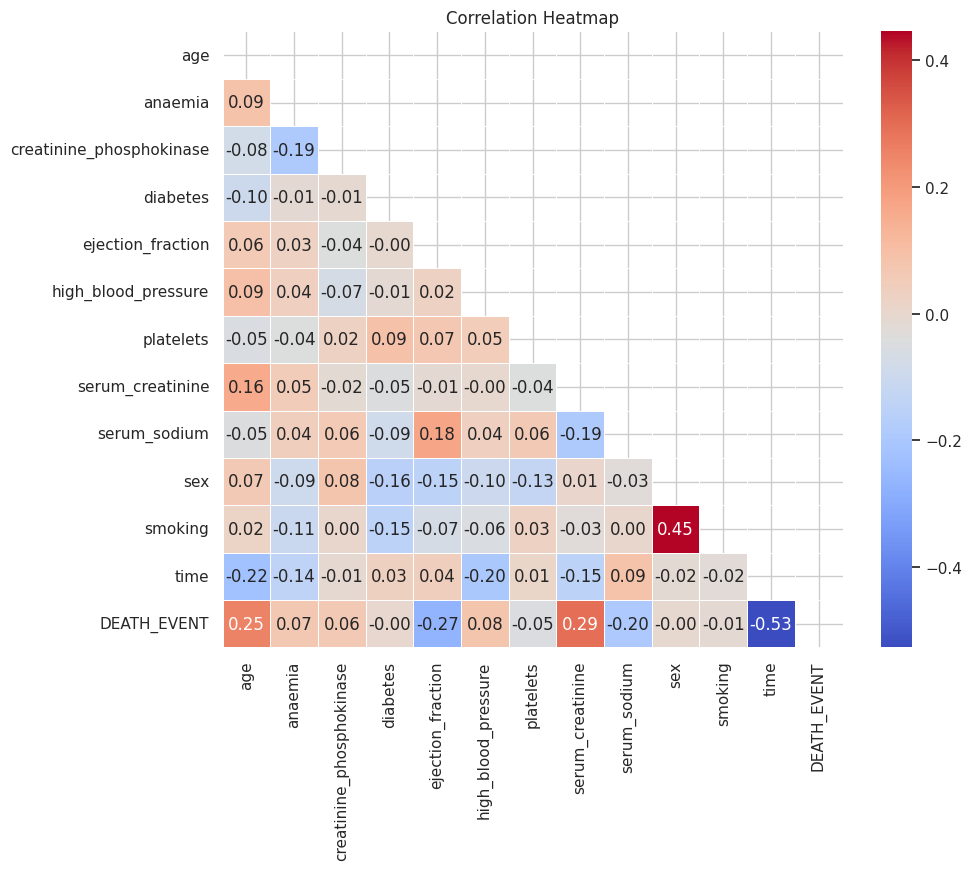

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')

Attention to DEATH_EVENT attributes as the target with others in dataset.

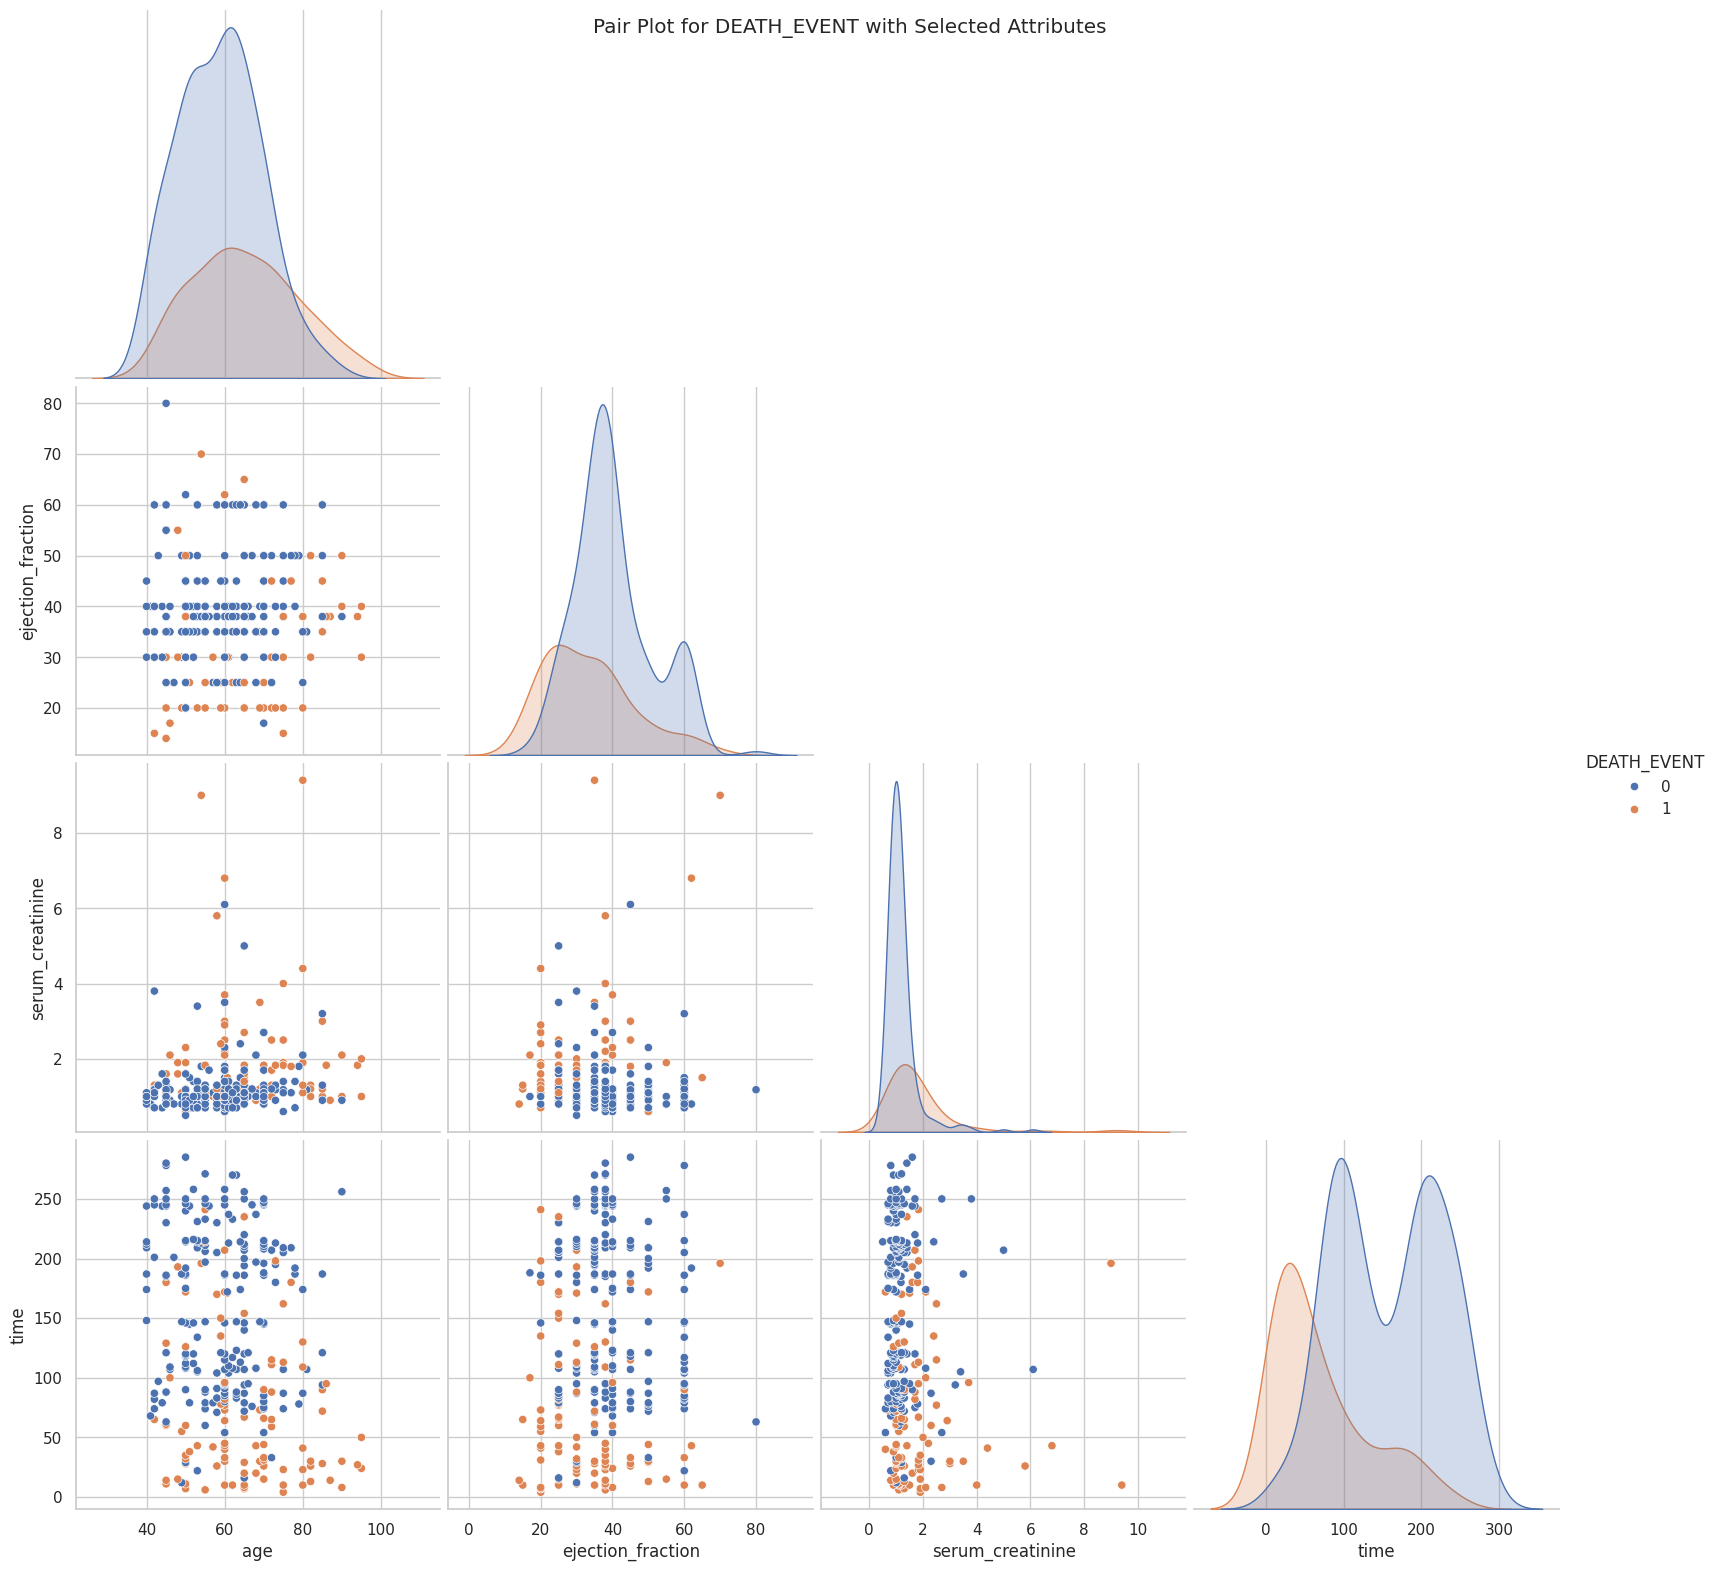

In [15]:
# Specify the attributes you want to include
attributes = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

# Create pair plot with 'DEATH_EVENT' as hue
sns.pairplot(df, vars=attributes, hue='DEATH_EVENT', diag_kind='kde', height=4, aspect = 1, corner=True)
plt.suptitle('Pair Plot for DEATH_EVENT with Selected Attributes')
plt.show()

* **Notation:** There is no significant trend in this dataset. While some attributes have valuable correlations with the target variable, these correlations are not strong enough to establish a clear trend.

## **Conclusion**  

* There are 299 non-null values in all the attributes thus no missing values and no duplicated rows.

* Datatype is also either `float64` or `int64`, all works well except age, whose datatype `float64` is not suitable for that attribute.
  
* There are many attributes containing outliers in the dataset, which are mainly related to clinical measurement, such as: `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine` and `serum_sodium`.

* Imbalance has existed in the dataset, particularly in the target variable and a few categorical variables like `high_blood_pressure` and `sex`.

* There are no trends between the target attributes and the other attributes in this dataset due to low correlations.

## **Solution**

### **Handling inappropriated datatype by asType() method**

Using `.astype()` method provided by Pandas to convert the 'age' attribute's datatype to an `int64`. This ensures consistency and allows for proper numerical analysis.

In [16]:
df['age'] = df['age'].apply(np.ceil)
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


### **Handling outliers in dataset by Robust Scaler:**


In [17]:
# Columns to scale
columns_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Select the columns to be scaled
df_to_scale = df[columns_to_scale]

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the selected data and transform it
scaled_data = scaler.fit_transform(df_to_scale)

In [18]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the rest of the DataFrame
df_scaled = pd.concat([df_scaled, df.drop(columns=columns_to_scale)], axis=1)
df_scaled

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.789474,0.713212,-1.200000,0.032967,1.6,-1.166667,-0.853846,0,0,1,1,0,1
1,-0.263158,16.350161,0.000000,0.014923,0.0,-0.166667,-0.838462,0,0,0,1,0,1
2,0.263158,-0.223416,-1.200000,-1.098901,0.4,-1.333333,-0.830769,0,0,0,1,1,1
3,-0.526316,-0.298604,-1.200000,-0.571429,1.6,0.000000,-0.830769,1,0,0,1,0,1
4,0.263158,-0.193340,-1.200000,0.714286,3.2,-3.500000,-0.823077,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.105263,-0.406015,0.000000,-1.175824,0.0,1.000000,1.192308,0,1,1,1,1,0
295,-0.263158,3.372718,0.000000,0.087912,0.2,0.333333,1.200000,0,0,0,0,0,0
296,-0.789474,3.888292,1.466667,5.274725,-0.6,0.166667,1.253846,0,1,0,0,0,0
297,-0.789474,4.646617,0.000000,-1.340659,0.6,0.500000,1.269231,0,0,0,1,1,0


### **Divide dataset for train and test set.**

In [19]:
X = df_scaled.drop(['DEATH_EVENT'], axis=1)
y = df_scaled['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

### **Handling imbalance by SMOTE method:**

* **Changes in distributions after balancing SMOTE:**

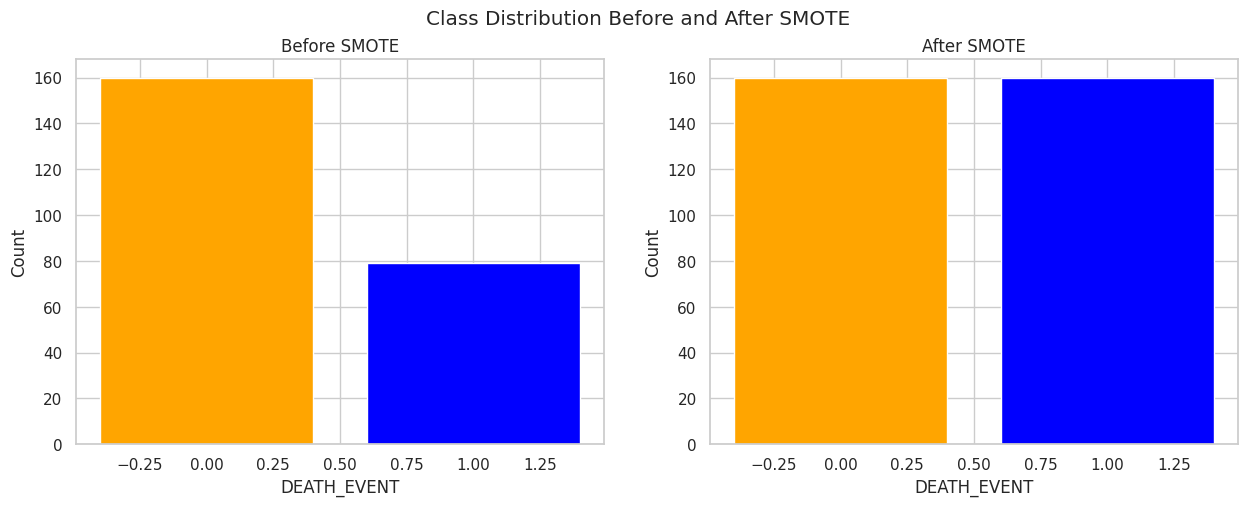

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the class distribution before SMOTE on the first subplot
before_smote = Counter(y_train)
ax1.bar(before_smote.keys(), before_smote.values(), color=['blue', 'orange'])
ax1.set_title('Before SMOTE')
ax1.set_xlabel('DEATH_EVENT')
ax1.set_ylabel('Count')

# Apply SMOTE to the data
sm = SMOTE(random_state=94)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

after_smote = Counter(y_train_smote)
ax2.bar(after_smote.keys(), after_smote.values(), color=['blue', 'orange'])
ax2.set_title('After SMOTE')
ax2.set_xlabel('DEATH_EVENT')
ax2.set_ylabel('Count')

# Add labels and title to the figure
plt.suptitle('Class Distribution Before and After SMOTE')
plt.show()

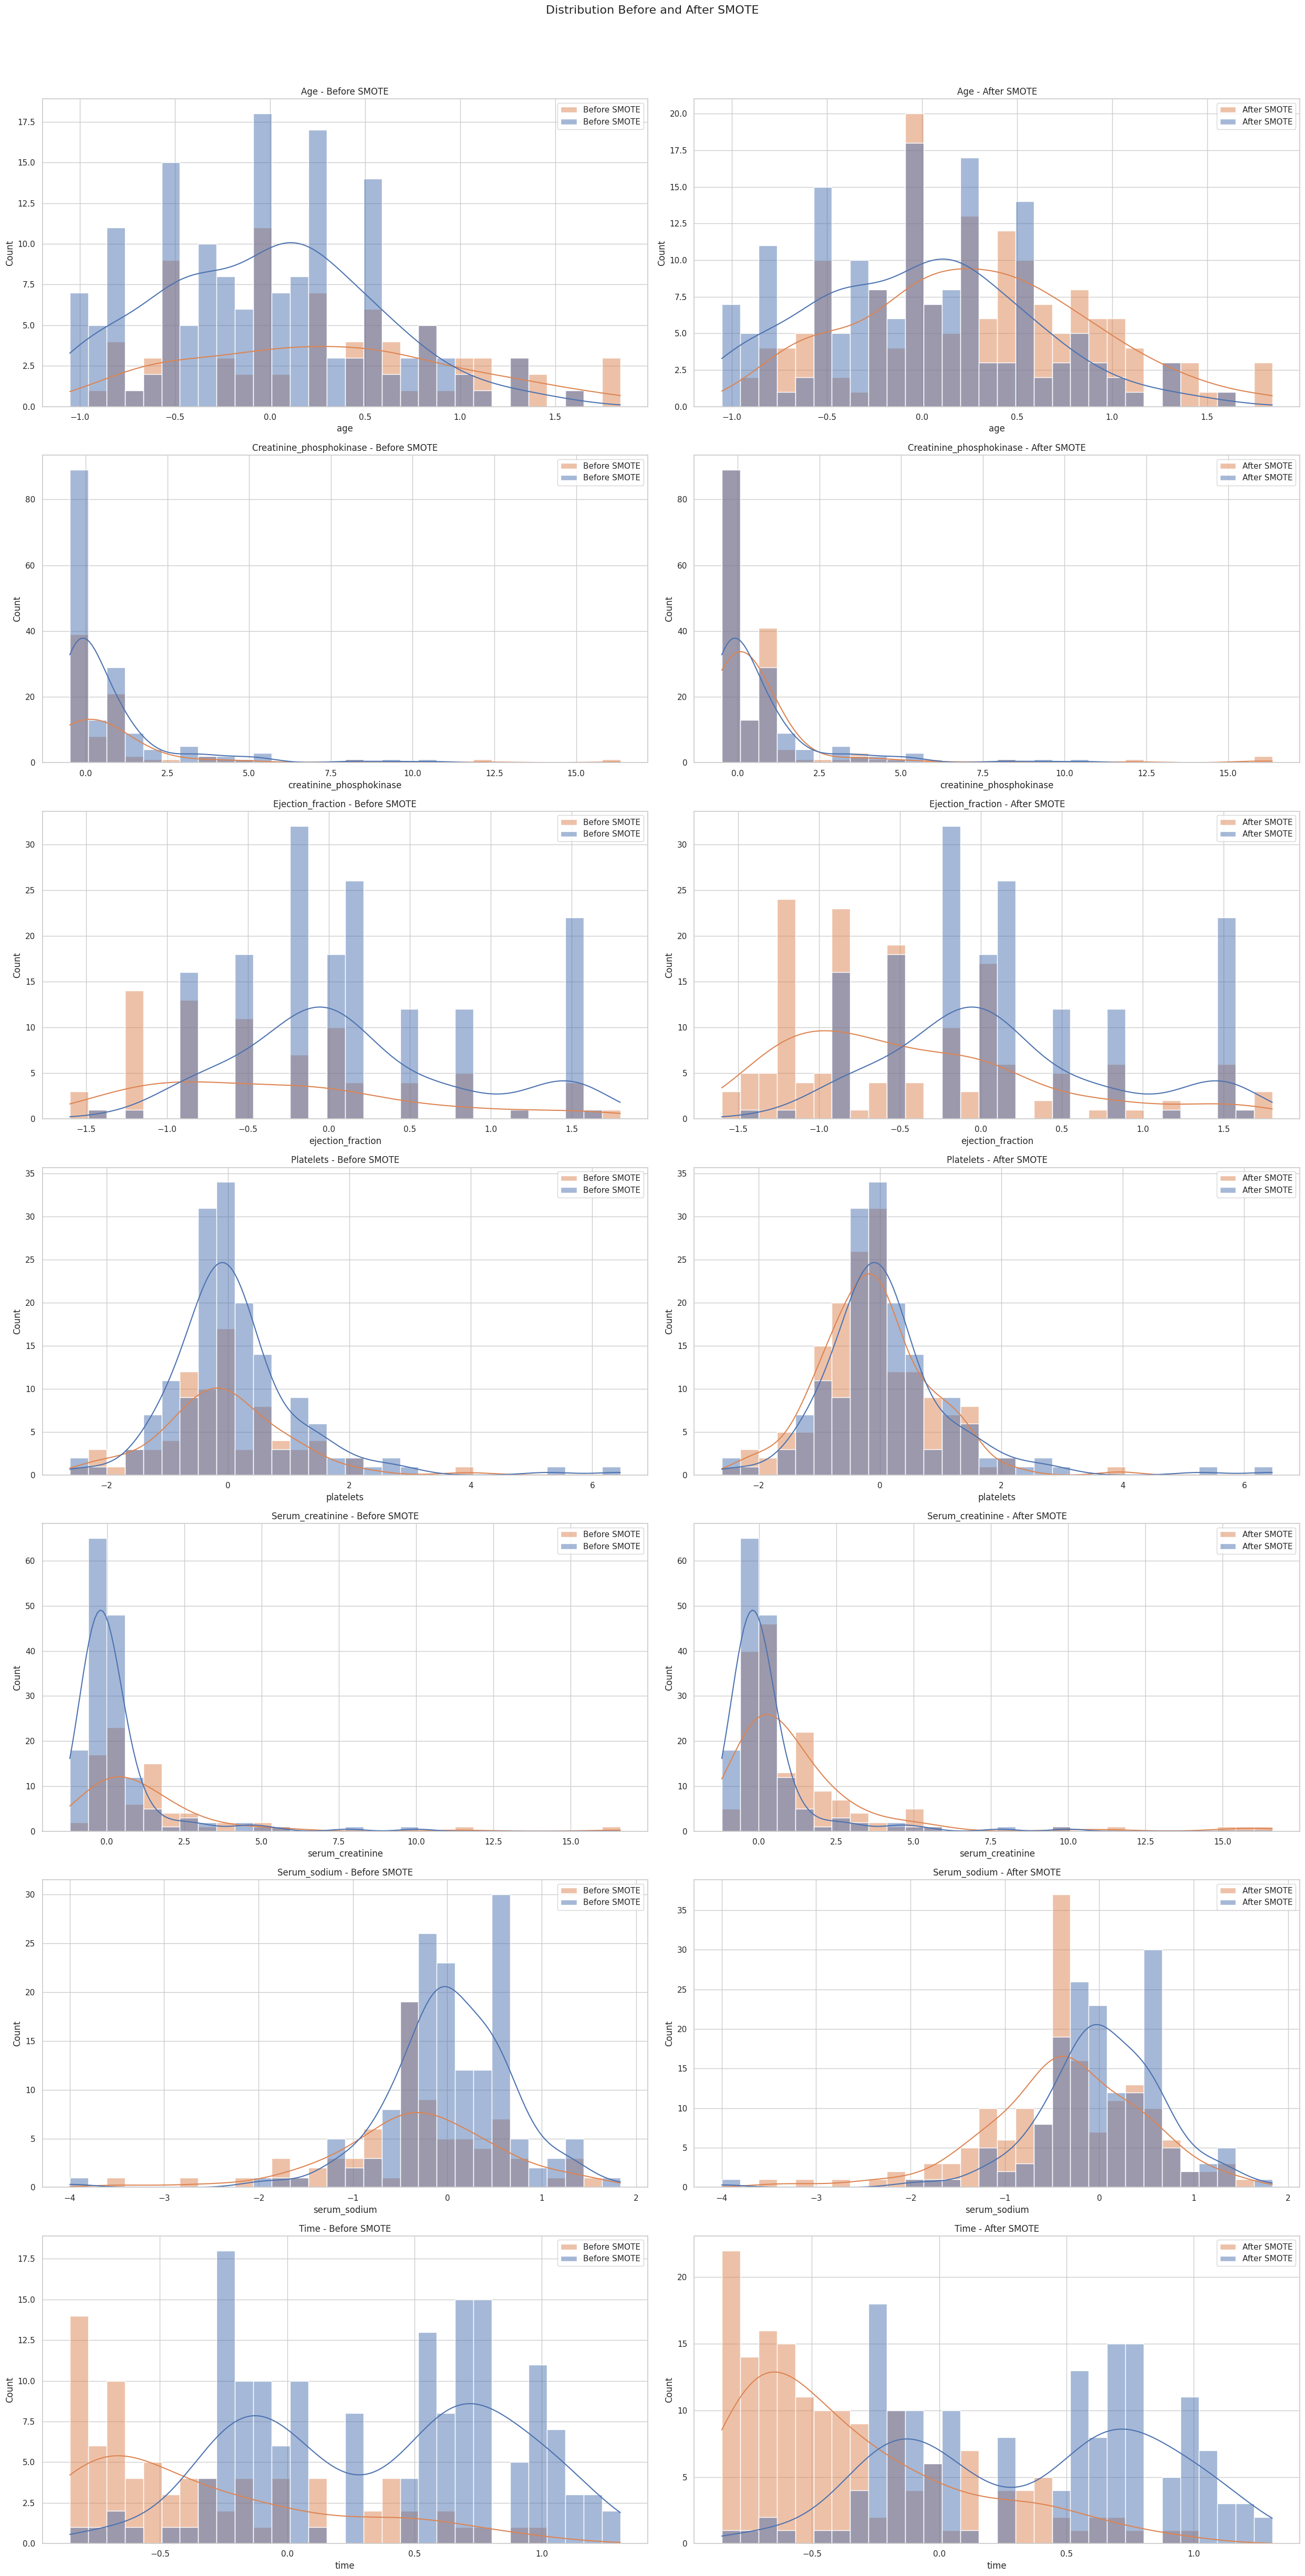

In [21]:
# Function to plot histograms for continuous variables
train_before = pd.concat([X_train, y_train], axis=1)
train_after = pd.concat([X_train_smote, y_train_smote], axis=1)

def plot_continuous_distributions(data_before, data_after, columns, target, title):
    fig, axes = plt.subplots(len(columns), 2, figsize=(25, 50))
    for i, col in enumerate(columns):
        sns.histplot(data_before, x=col, hue=target, kde=True, bins=30, ax=axes[i, 0], alpha=0.5, label='Before SMOTE')
        sns.histplot(data_after, x=col, hue=target, kde=True, bins=30, ax=axes[i, 1], alpha=0.5, label='After SMOTE')
        axes[i, 0].set_title(f'{col.capitalize()} - Before SMOTE')
        axes[i, 1].set_title(f'{col.capitalize()} - After SMOTE')
        axes[i, 0].legend()
        axes[i, 1].legend()
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Plot continuous distributions
continuous_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plot_continuous_distributions(train_before, train_after, continuous_columns, 'DEATH_EVENT', 'Distribution Before and After SMOTE')

In [22]:
X_train1 = X_train_smote[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
X_test1 = X_test[['age', 'ejection_fraction', 'serum_creatinine', 'time']]

# **Models Implementation** (HAI NGOC - ITDSIU21057) & (DINH AN - ITDSIU20113)

## Naïve Bayes

####Using all attributes

In [23]:
model = GaussianNB()

In [24]:
model.fit(X_train_smote, y_train_smote)

GaussianNB()

In [25]:
y_test

27     1
285    0
188    0
24     1
47     1
223    0
268    0
176    0
139    0
39     1
287    0
260    0
256    0
80     0
48     1
62     0
276    0
69     1
168    0
125    0
36     1
81     0
205    0
217    1
60     1
152    0
142    0
173    0
25     1
264    0
172    0
71     0
175    0
209    0
67     1
145    0
54     1
57     0
269    0
181    1
251    0
28     1
122    0
297    0
82     1
95     0
92     0
153    0
106    0
64     0
76     0
12     1
190    0
86     0
73     0
267    0
141    0
51     1
94     0
20     0
Name: DEATH_EVENT, dtype: int64

In [26]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [27]:
accuracy_score(y_test, model.predict(X_test))

0.9

####Using 4 attributes only



In [28]:
model = GaussianNB()

In [29]:
model.fit(X_train1, y_train_smote)

GaussianNB()

In [30]:
model.predict(X_test1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [31]:
y_pred = model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.76      0.94      0.84        17

    accuracy                           0.90        60
   macro avg       0.87      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.9124487004103967

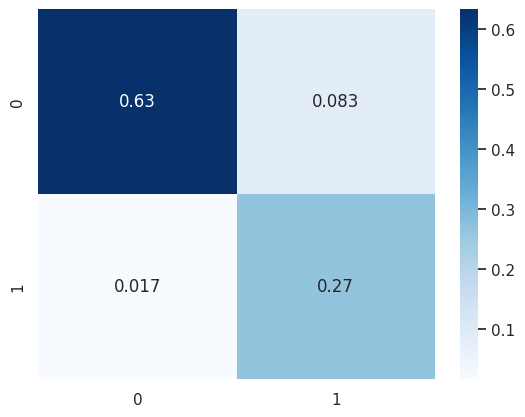

In [32]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

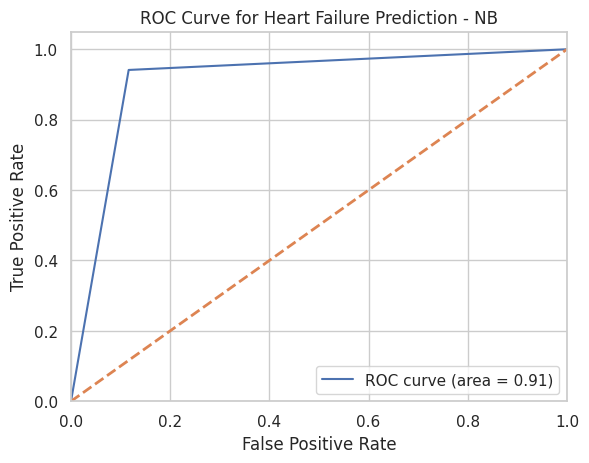

In [33]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [34]:
def optimizing(trial):
  var_smoothing = trial.suggest_float('var_smoothing', 1e-12, 1e-6, log=True)
  model = GaussianNB(var_smoothing=var_smoothing)

  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [35]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-06-03 13:40:35,159] A new study created in memory with name: no-name-2496c543-251f-43e8-b8ba-966f7e0146dd
[I 2024-06-03 13:40:35,242] Trial 0 finished with value: 0.81875 and parameters: {'var_smoothing': 4.363460167844285e-09}. Best is trial 0 with value: 0.81875.
[I 2024-06-03 13:40:35,315] Trial 1 finished with value: 0.81875 and parameters: {'var_smoothing': 2.041215084392493e-08}. Best is trial 0 with value: 0.81875.
[I 2024-06-03 13:40:35,389] Trial 2 finished with value: 0.81875 and parameters: {'var_smoothing': 4.188087061728271e-07}. Best is trial 0 with value: 0.81875.
[I 2024-06-03 13:40:35,465] Trial 3 finished with value: 0.81875 and parameters: {'var_smoothing': 1.7629982629563863e-11}. Best is trial 0 with value: 0.81875.
[I 2024-06-03 13:40:35,537] Trial 4 finished with value: 0.81875 and parameters: {'var_smoothing': 5.23824333562317e-09}. Best is trial 0 with value: 0.81875.
[I 2024-06-03 13:40:35,615] Trial 5 finished with value: 0.81875 and parameters: {'var

In [36]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8187
  Params: 
    var_smoothing: 4.363460167844285e-09


In [37]:
best_params = study.best_params

best_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_model.fit(X_train1, y_train_smote)

GaussianNB(var_smoothing=4.363460167844285e-09)

In [38]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.76      0.94      0.84        17

    accuracy                           0.90        60
   macro avg       0.87      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.9124487004103967

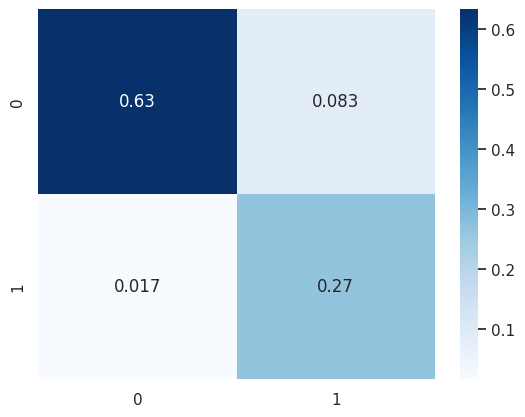

In [39]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

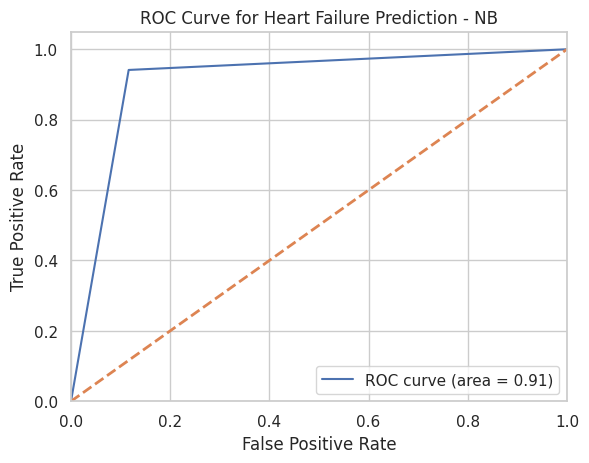

In [40]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## SVM

####Using all attributes

In [41]:
svc=SVC() #Default hyperparameters
display(svc)

svc.fit(X_train_smote, y_train_smote)

y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

SVC()

Accuracy Score:
0.8666666666666667


####Using 4 attributes only

In [42]:
svc=SVC() #Default hyperparameters

svc.fit(X_train1,y_train_smote)

SVC()

In [43]:
y_pred = svc.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm2 = confusion_matrix(y_test, y_pred)
cm2 = cm2/np.sum(cm2)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.75      0.88      0.81        17

    accuracy                           0.88        60
   macro avg       0.85      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60


ROC AUC Score:


0.8830369357045144

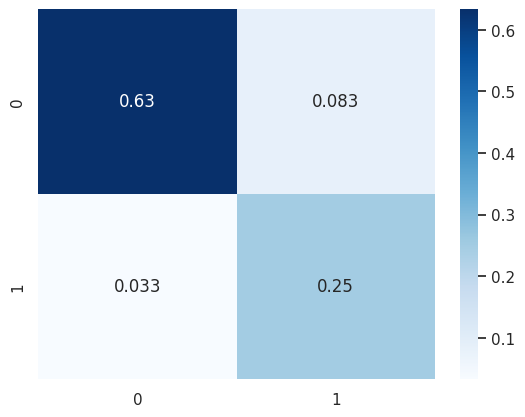

In [44]:
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.show()

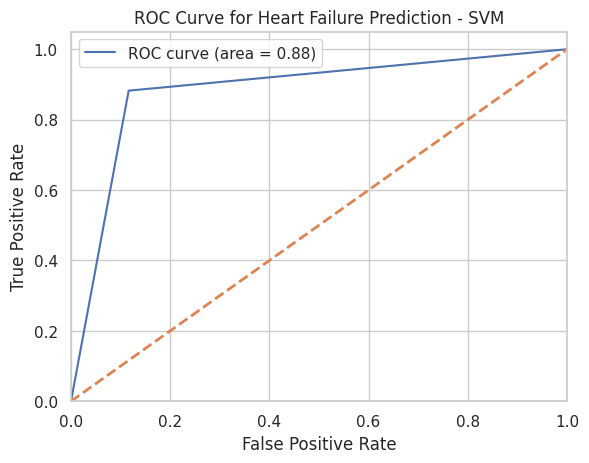

In [45]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - SVM')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [46]:
def optimizing(trial):
  # Suggest values for the hyperparameters
  C = trial.suggest_float('C', 1e-5, 1e5, log=True)
  gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
  kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
  degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3

  model = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree)
  skf = StratifiedKFold(n_splits=10)
  scores = cross_val_score(model, X_train1, y_train_smote, cv=skf, scoring='accuracy')

  return scores.mean()

In [47]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=100)

[I 2024-06-03 13:40:43,542] A new study created in memory with name: no-name-67c199ab-b570-4a7c-bc2f-914c9f1ddc37
[I 2024-06-03 13:40:44,919] Trial 0 finished with value: 0.8125 and parameters: {'C': 926.7948533704795, 'gamma': 'auto', 'kernel': 'linear'}. Best is trial 0 with value: 0.8125.
[I 2024-06-03 13:40:45,084] Trial 1 finished with value: 0.8125 and parameters: {'C': 10.155089023499714, 'gamma': 'auto', 'kernel': 'poly', 'degree': 3}. Best is trial 0 with value: 0.8125.
[I 2024-06-03 13:40:45,177] Trial 2 finished with value: 0.85 and parameters: {'C': 0.021362987929317838, 'gamma': 'auto', 'kernel': 'rbf'}. Best is trial 2 with value: 0.85.
[I 2024-06-03 13:40:45,261] Trial 3 finished with value: 0.5125 and parameters: {'C': 0.0006747826308699621, 'gamma': 'scale', 'kernel': 'poly', 'degree': 4}. Best is trial 2 with value: 0.85.
[I 2024-06-03 13:40:45,512] Trial 4 finished with value: 0.8125 and parameters: {'C': 84.59551931051976, 'gamma': 'auto', 'kernel': 'linear'}. Best 

In [48]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.8594
  Params: 
    C: 0.05695330754047806
    gamma: scale
    kernel: rbf


In [49]:
best_params = study.best_params

best_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_model.fit(X_train1, y_train_smote)

SVC(C=0.05695330754047806)

In [50]:
y_pred = best_model.predict(X_test1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm1 = cm1/np.sum(cm1)

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.79      0.88      0.83        17

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.8946648426812586

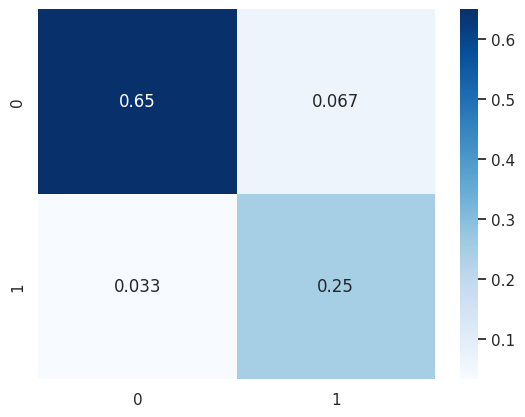

In [51]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.show()

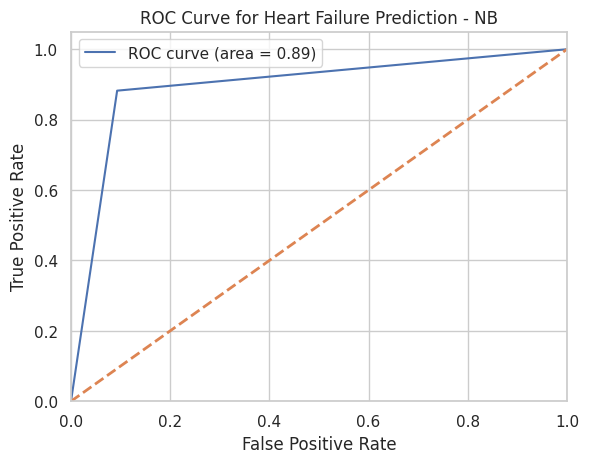

In [53]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - NB')
plt.legend()
plt.show()

## ANN

#### Using all attributes

In [178]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [179]:
early_stop = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True, monitor="accuracy")
history = model.fit(X_train_smote, y_train_smote, batch_size = 25, epochs = 500,callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5031
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5063
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5531
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6562
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.7031
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.7531
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.7188
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7781
Epoch 11/

In [180]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

accuracy_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 5ms/step


0.85

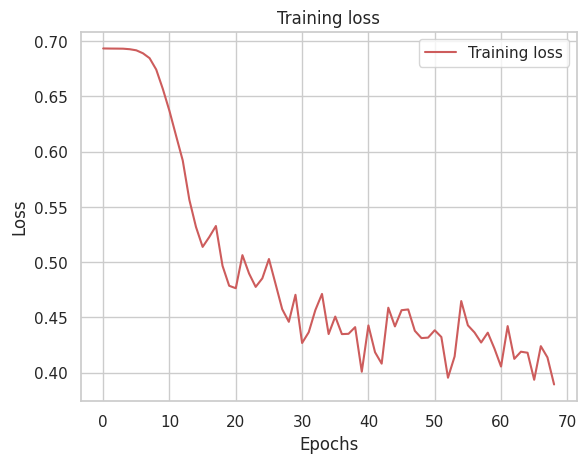

In [181]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

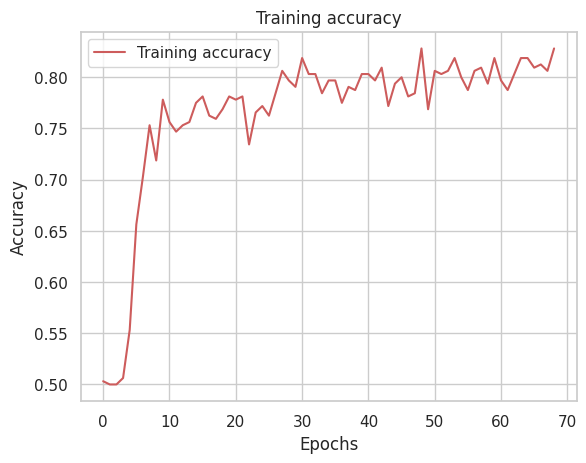

In [182]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Use 4 attributes only

In [186]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [187]:
history = model.fit(X_train1, y_train_smote, batch_size = 25, epochs = 500,callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4719
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5156
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5188
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.6094
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.7406
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.7531
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.7375
Epoch 11/

In [188]:
y_pred = model.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.71      0.88      0.79        17

    accuracy                           0.87        60
   macro avg       0.83      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60


ROC AUC Score:


0.8714090287277702

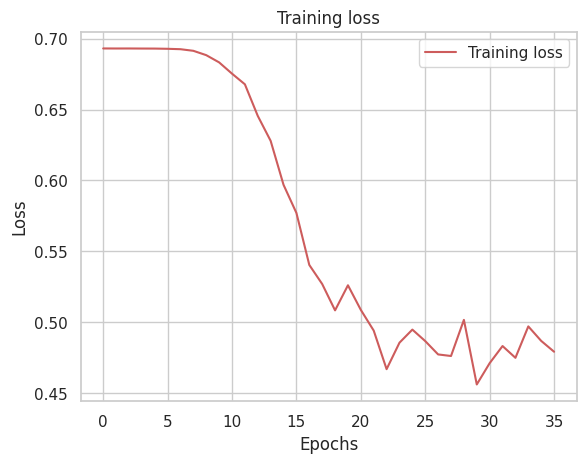

In [189]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

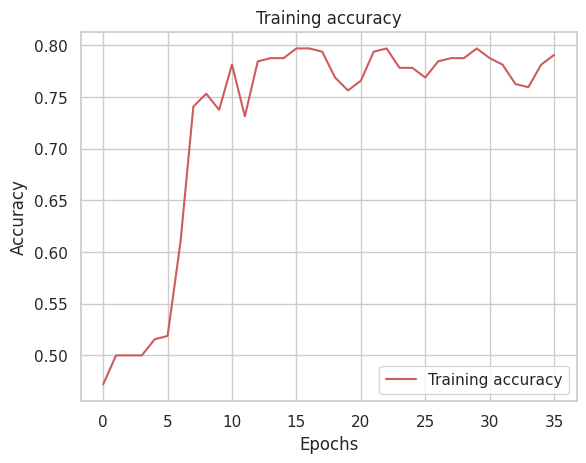

In [190]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

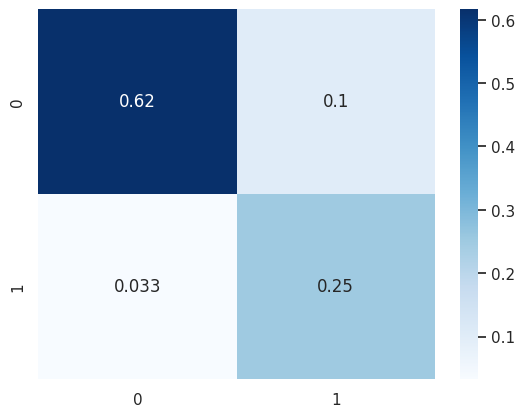

In [191]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues')
plt.show()

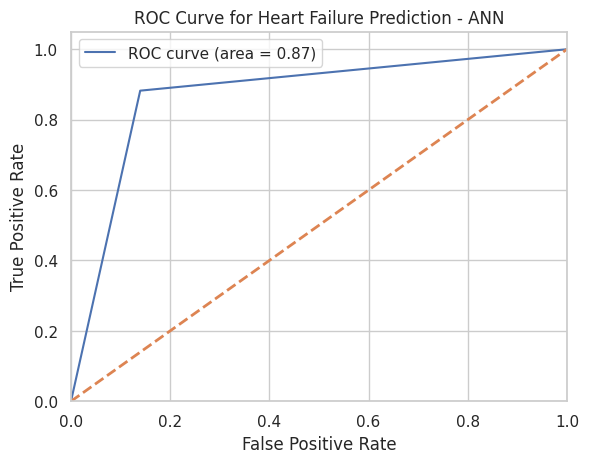

In [192]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - ANN')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [78]:
def create_model(learning_rate, dropout_1st, dropout_2nd):
    model = Sequential()
    model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=4))
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_1st))
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_2nd))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [79]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=94)

def optimizing(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_int("batch_size", 10, 50)
    dropout_1st = trial.suggest_float("dropout_1st", 0.2, 0.5)
    dropout_2nd = trial.suggest_float("dropout_2nd", 0.5, 0.8)

    model = create_model(learning_rate, dropout_1st, dropout_2nd)

    cv_scores = []
    for train_index, val_index in skf.split(X_train1, y_train_smote):
        X_train_fold, X_val_fold = X_train1.to_numpy()[train_index], X_train1.to_numpy()[val_index]
        y_train_fold, y_val_fold = y_train_smote.to_numpy()[train_index], y_train_smote.to_numpy()[val_index]

        early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

        history = model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=batch_size,
                            validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)

        val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(val_acc)

    return np.mean(cv_scores)

In [80]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizing, n_trials=50)

[I 2024-06-03 13:52:51,568] A new study created in memory with name: no-name-a4cc23e0-ba86-4d3b-ad50-49714610dcdc
[I 2024-06-03 13:53:49,350] Trial 0 finished with value: 0.8375 and parameters: {'learning_rate': 9.27674716811893e-05, 'batch_size': 26, 'dropout_1st': 0.3190011496853884, 'dropout_2nd': 0.6390296418494699}. Best is trial 0 with value: 0.8375.
[I 2024-06-03 13:54:55,313] Trial 1 finished with value: 0.78125 and parameters: {'learning_rate': 1.5031558878127087e-05, 'batch_size': 44, 'dropout_1st': 0.2301860321164082, 'dropout_2nd': 0.511167903009325}. Best is trial 0 with value: 0.8375.
[I 2024-06-03 13:55:08,480] Trial 2 finished with value: 0.878125 and parameters: {'learning_rate': 0.0031218114737761034, 'batch_size': 23, 'dropout_1st': 0.4089265090757285, 'dropout_2nd': 0.6353056138172686}. Best is trial 2 with value: 0.878125.
[I 2024-06-03 13:55:32,724] Trial 3 finished with value: 0.84375 and parameters: {'learning_rate': 0.0004786149872288502, 'batch_size': 20, 'dro

In [81]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9000
  Params: 
    learning_rate: 0.0058464786783920765
    batch_size: 19
    dropout_1st: 0.43274841253119634
    dropout_2nd: 0.575931549399164


In [123]:
best_params = study.best_params

model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(best_params['dropout_1st']))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(best_params['dropout_2nd']))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [124]:
history = model.fit(X_train1, y_train_smote, batch_size = best_params['batch_size'], epochs = 200, callbacks=[early_stop])

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4906
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5437
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5844
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6500
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6938
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7344
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6844
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7250
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7031
Epoch 11/

In [125]:
y_pred = model.predict(X_test1)
y_pred_binary = np.round(y_pred).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_binary))

print('\nROC AUC Score:')
roc_auc_score(y_test, y_pred_binary)

2/2 [==============================] - 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.79      0.88      0.83        17

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60


ROC AUC Score:


0.8946648426812586

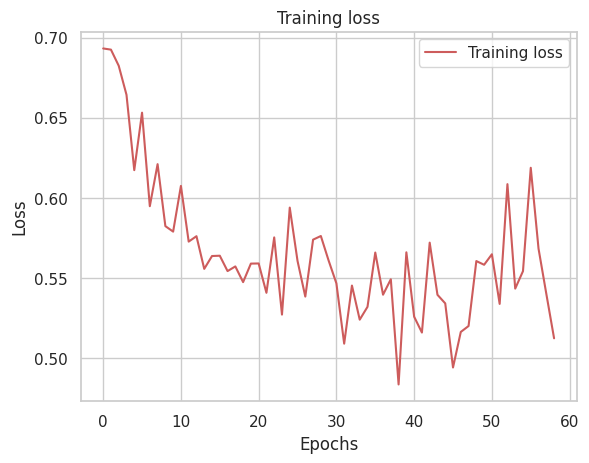

In [126]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

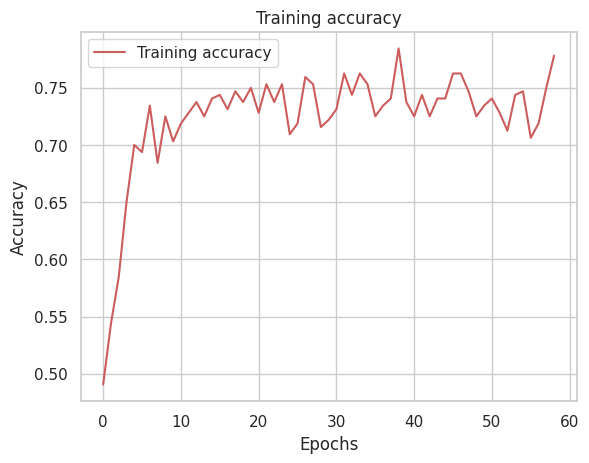

In [127]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

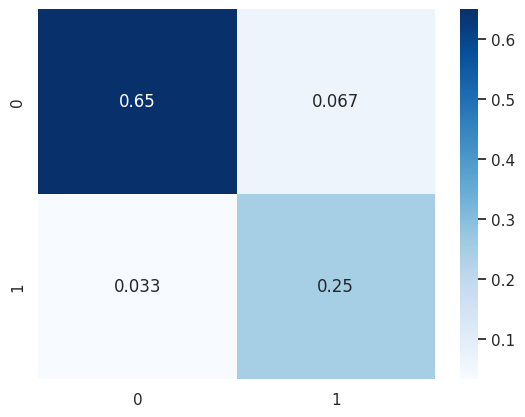

In [128]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues')
plt.show()

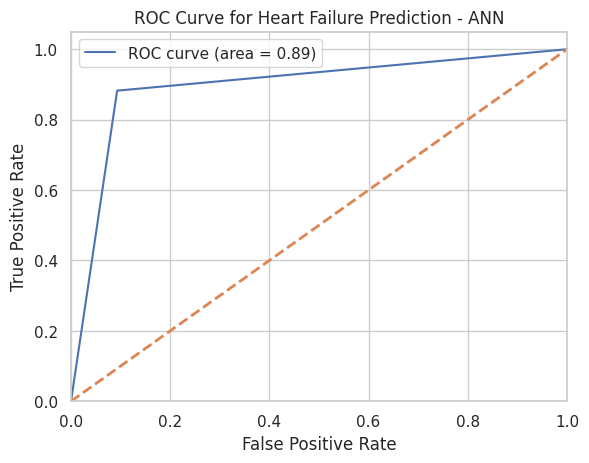

In [129]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Failure Prediction - ANN')
plt.legend()
plt.show()